In [312]:
import pandas as pd

# Load the dataset
customer_data = pd.read_csv('customer_dataset.csv')

/var/folders/p1/z8dhpprj11b1w1rsyp3fh4zr0000gn/T/ipykernel_37689/3294755354.py:4: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  customer_data = pd.read_csv('customer_dataset.csv')


In [313]:
customer_data.head(5)

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size
0,1,790,1.11,2.84
1,2,176875,15.74,33.83
2,3,6812,2.11,NaN
3,4,38542,7.82,10.73
4,5,48712,7.51,10.04


In [314]:
customer_data.count()

customer_id                        570000
average_monthly_spend              560614
average_monthly_visit_frequency    560672
average_monthly_basket_size        560714
dtype: int64

In [315]:
# Check for duplicates
duplicate_rows = customer_data['customer_id'].duplicated().sum()
print("Duplicate Rows:", duplicate_rows)

Duplicate Rows: 10000


In [316]:
# Remove duplicates based on 'customer_id'
customer_data.drop_duplicates(subset=['customer_id'], inplace=True)

In [317]:
# Check if a specific column contains multiple data types
def check_mixed_types(series):
    types = series.map(type).unique()  # Maps the type function to all elements and gets unique types
    return len(types) > 1  # Returns True if more than one type is found

# Apply this check to each column in the DataFrame
mixed_type_columns = {col: check_mixed_types(customer_data[col]) for col in customer_data.columns}
print(mixed_type_columns)

{'customer_id': False, 'average_monthly_spend': True, 'average_monthly_visit_frequency': True, 'average_monthly_basket_size': False}


In [318]:
# Function to count types in a column
def type_counts(series):
    return series.apply(lambda x: type(x).__name__).value_counts()

# Apply this function to each column you want to analyze
type_breakdown = type_counts(customer_data['average_monthly_spend'])
print(type_breakdown)


average_monthly_spend
float    431105
str      128895
Name: count, dtype: int64


In [319]:
from word2number import w2n

def smart_convert(x):
    try:
        return float(x)
    except ValueError:
        try:
            return w2n.word_to_num(x)
        except ValueError:
            return None  # Still return None if conversion fails

# Apply this smarter conversion function
customer_data['average_monthly_spend'] = customer_data['average_monthly_spend'].apply(smart_convert)

In [320]:
# Function to count types in a column
def type_counts(series):
    return series.apply(lambda x: type(x).__name__).value_counts()

# Apply this function to each column you want to analyze
type_breakdown = type_counts(customer_data['average_monthly_visit_frequency'])
print(type_breakdown)

average_monthly_visit_frequency
float    396029
str      163971
Name: count, dtype: int64


In [321]:
from word2number import w2n

def smart_convert(x):
    try:
        return float(x)
    except ValueError:
        try:
            return w2n.word_to_num(x)
        except ValueError:
            return None  # Still return None if conversion fails

# Apply this smarter conversion function
customer_data['average_monthly_visit_frequency'] = customer_data['average_monthly_visit_frequency'].apply(smart_convert)

In [322]:
# Check for missing values
missing_values = customer_data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 customer_id                           0
average_monthly_spend              9386
average_monthly_visit_frequency    9328
average_monthly_basket_size        9286
dtype: int64


In [323]:
columns = ['average_monthly_spend', 'average_monthly_visit_frequency', 'average_monthly_basket_size']

In [324]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
# Apply Iterative Imputer
imputer = IterativeImputer(max_iter=10, random_state=42)
customer_data[columns] = imputer.fit_transform(customer_data[columns])

In [325]:
# Check for missing values
missing_values = customer_data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 customer_id                        0
average_monthly_spend              0
average_monthly_visit_frequency    0
average_monthly_basket_size        0
dtype: int64


In [326]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

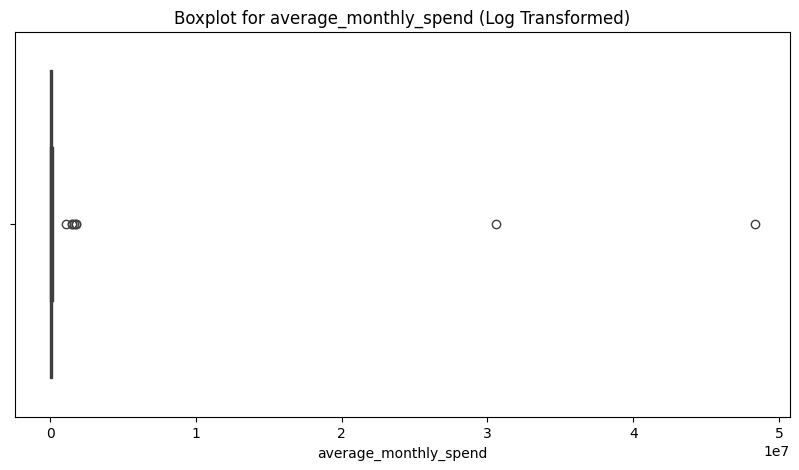

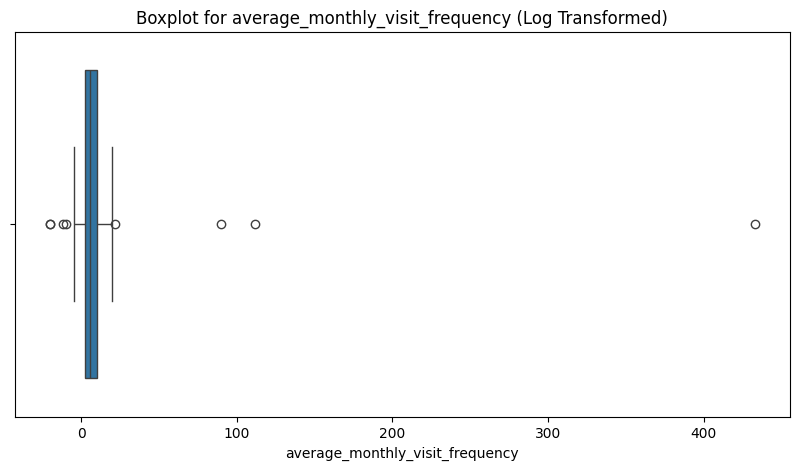

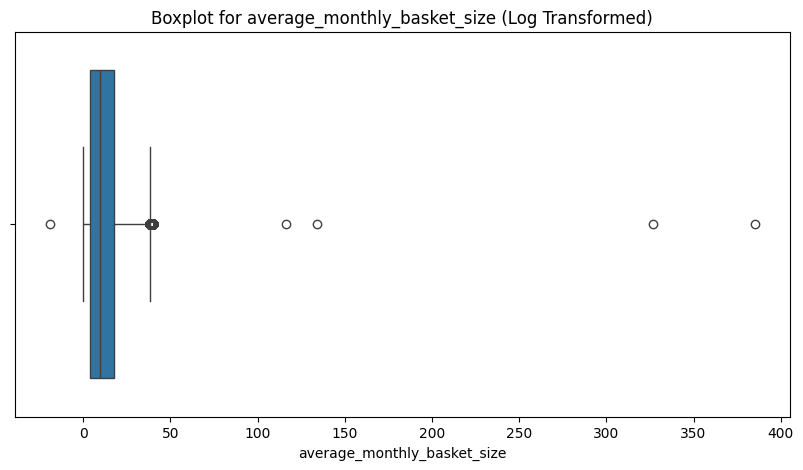

In [327]:
# Generate boxplots to identify outliers
for column_name in columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=customer_data[column_name])
    plt.title(f'Boxplot for {column_name} (Log Transformed)')
    plt.show()

In [328]:
# Handle outliers using the IQR method
for column_name in columns:
    Q1 = customer_data[column_name].quantile(0.25)
    Q3 = customer_data[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
        
    # Cap the outliers
    customer_data[column_name] = np.where(customer_data[column_name] < lower_bound, lower_bound, customer_data[column_name])
    customer_data[column_name] = np.where(customer_data[column_name] > upper_bound, upper_bound, customer_data[column_name])

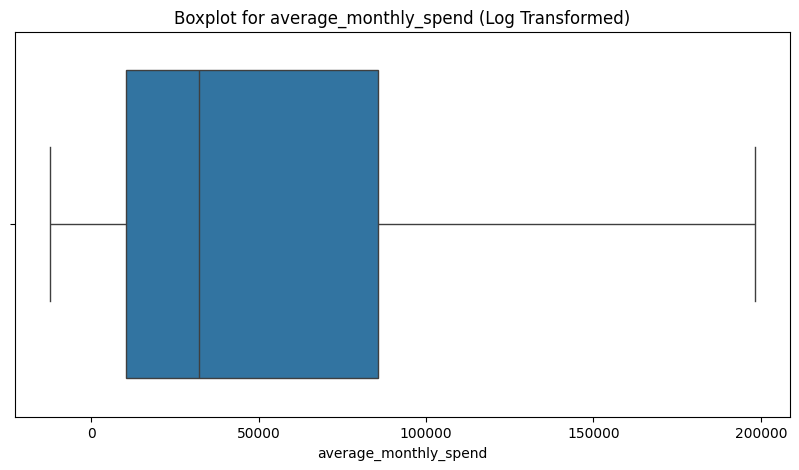

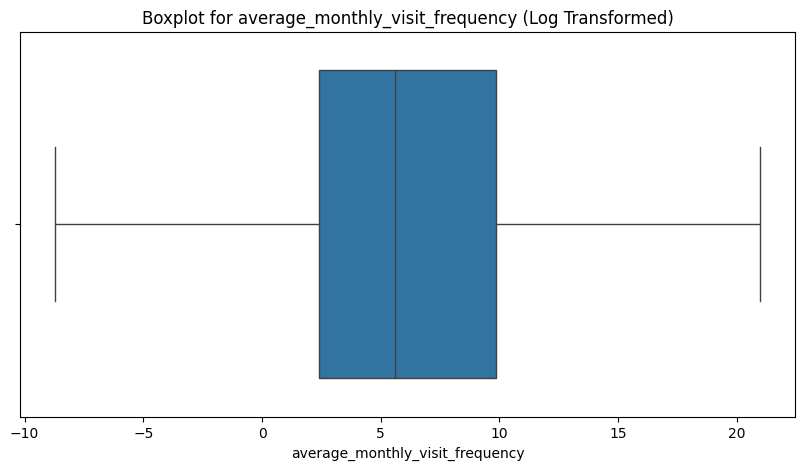

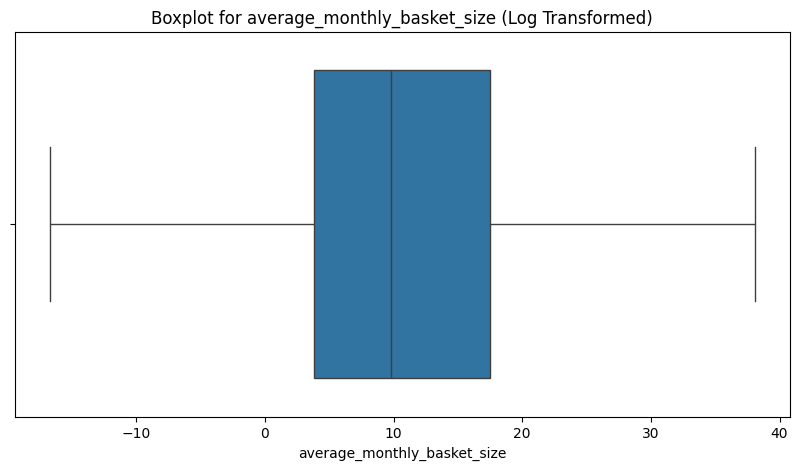

In [329]:
# Generate boxplots to identify outliers
for column_name in columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=customer_data[column_name])
    plt.title(f'Boxplot for {column_name} (Log Transformed)')
    plt.show()

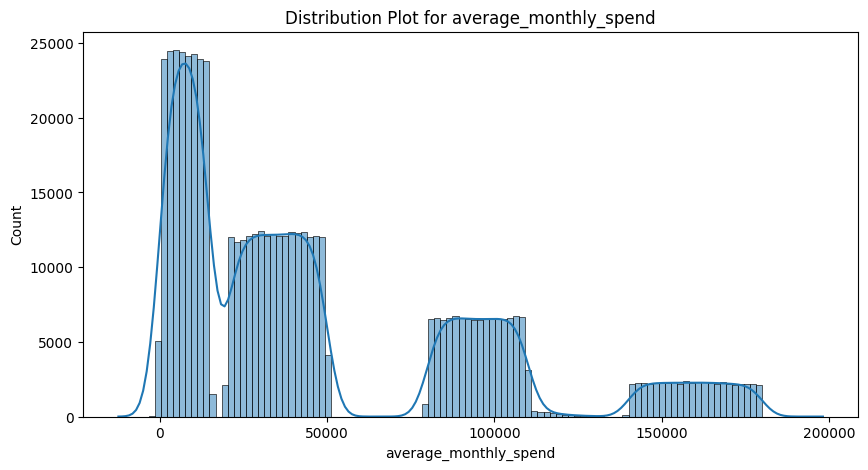

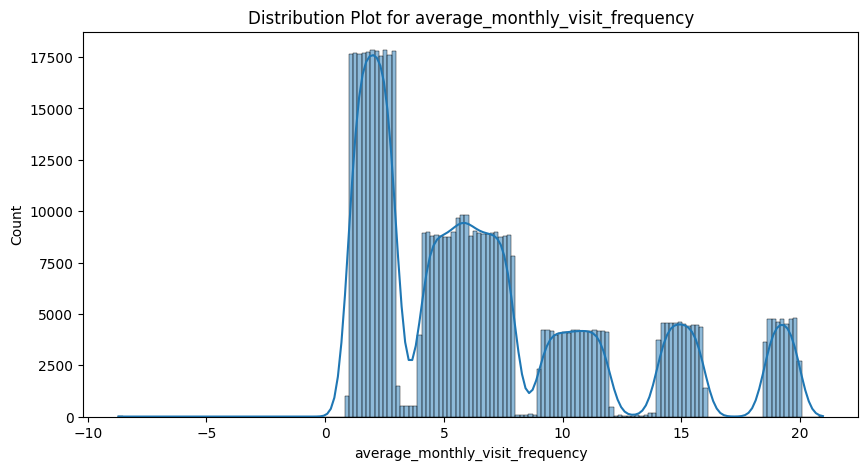

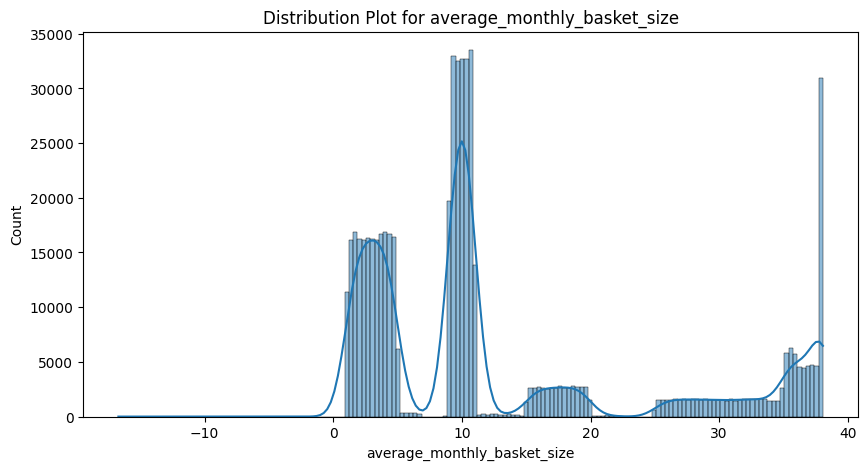

In [330]:
# Generate distribution plots
for column_name in columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(customer_data[column_name], kde=True)
    plt.title(f'Distribution Plot for {column_name}')
    plt.show()

In [331]:
# Check for missing values
missing_values = customer_data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 customer_id                        0
average_monthly_spend              0
average_monthly_visit_frequency    0
average_monthly_basket_size        0
dtype: int64


In [155]:
# # Apply Logarithmic Transformation
# for column_name in columns:
#     customer_data[column_name] = np.log1p(customer_data[column_name])

In [332]:
# Check for missing values
missing_values = customer_data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 customer_id                        0
average_monthly_spend              0
average_monthly_visit_frequency    0
average_monthly_basket_size        0
dtype: int64


In [333]:
# Drop rows with missing values
customer_data.dropna(inplace=True)

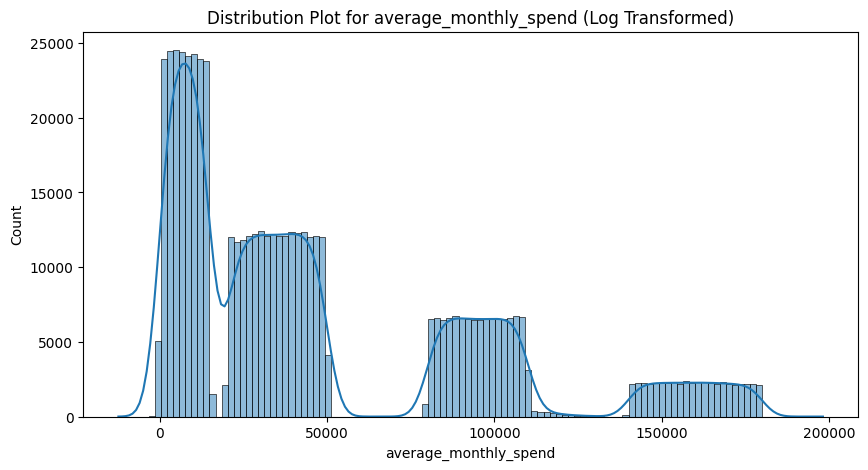

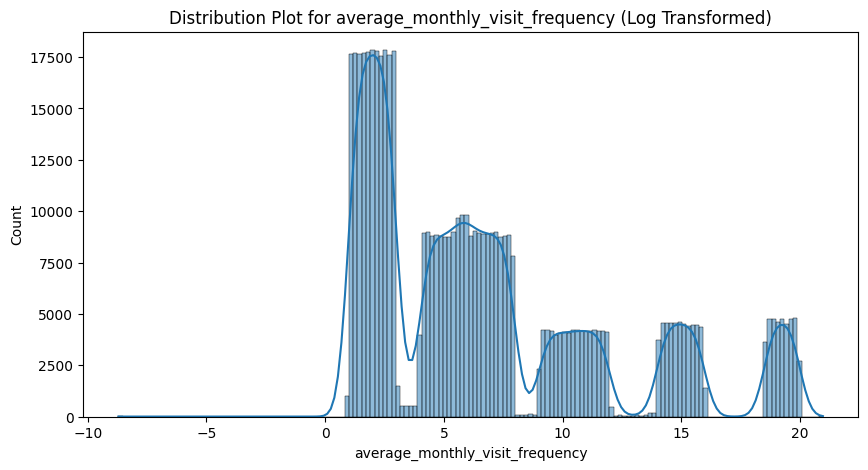

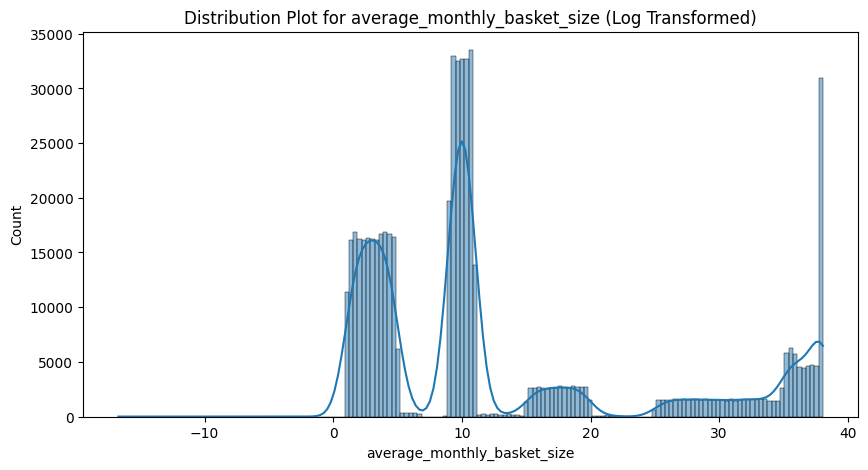

In [334]:
# Generate distribution plots
for column_name in columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(customer_data[column_name], kde=True)
    plt.title(f'Distribution Plot for {column_name} (Log Transformed)')
    plt.show()

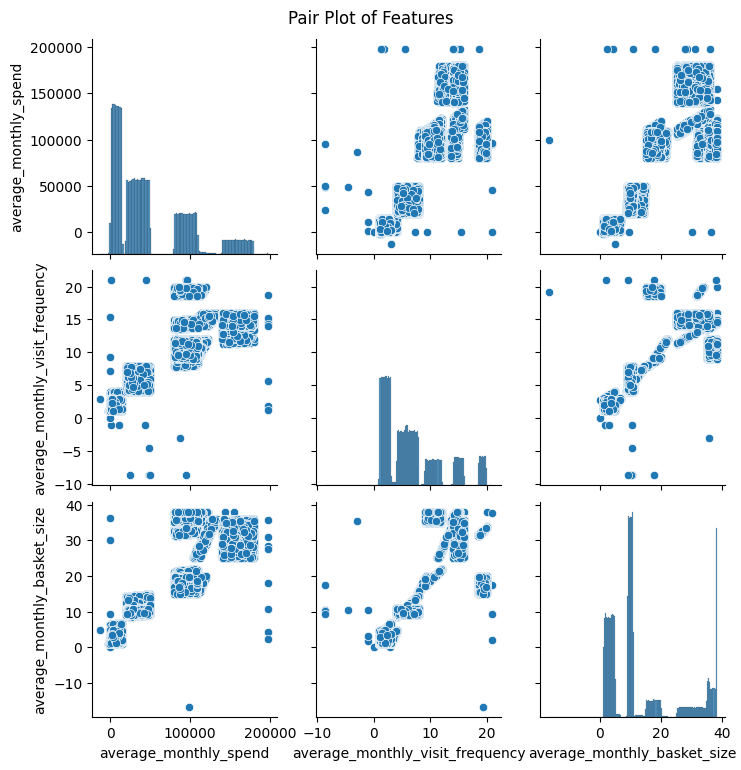

In [336]:
# Generate pair plots to visualize relationships between features
sns.pairplot(customer_data[columns])
plt.suptitle('Pair Plot of Features', y=1.02)
plt.show()

In [337]:
customer_data_log = customer_data.copy()

In [338]:
# Apply Logarithmic Transformation
for column_name in columns:
    customer_data_log[column_name] = np.log1p(customer_data_log[column_name])

/Users/vihidun/MyFolder/Development/Datastrome_5.0/myvenv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/vihidun/MyFolder/Development/Datastrome_5.0/myvenv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


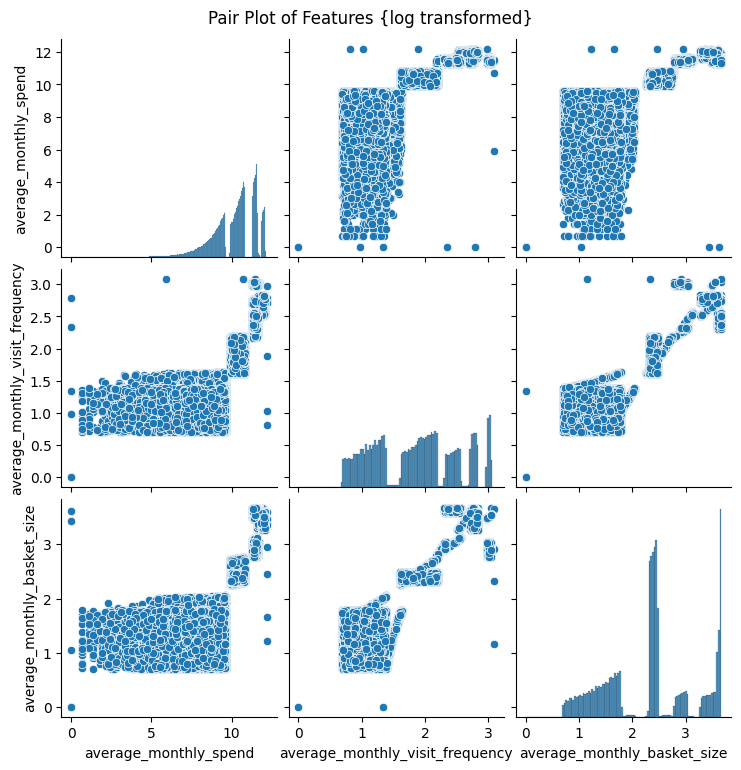

In [339]:
# Generate pair plots to visualize relationships between features
sns.pairplot(customer_data_log[columns])
plt.suptitle('Pair Plot of Features {log transformed}', y=1.02)
plt.show()

Key Observations from the Pair Plot:

Spend vs. Visit Frequency: Shows a clear upward trend, indicating that as visit frequency increases, the monthly spend also tends to increase. This is typical in retail data where more frequent visitors spend more over time.

Spend vs. Basket Size: Also exhibits an upward trend, suggesting that larger basket sizes correlate with higher spending, which is expected.

Visit Frequency vs. Basket Size: Displays a somewhat staggered but generally upward correlation, indicating that more frequent visits might be associated with slightly larger basket sizes, although this relationship appears less strong than that with spending.

In [160]:
# Check for missing values
missing_values = customer_data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 customer_id                        0
average_monthly_spend              0
average_monthly_visit_frequency    0
average_monthly_basket_size        0
dtype: int64


In [342]:
# Check for missing values
missing_values = customer_data_log.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 customer_id                        0
average_monthly_spend              0
average_monthly_visit_frequency    0
average_monthly_basket_size        0
dtype: int64


In [341]:
customer_data_log.dropna(inplace=True)

In [161]:
customer_data_permanent = customer_data.copy()

In [343]:
# Generate new features
customer_data['average_spend_per_visit'] = customer_data['average_monthly_spend'] / customer_data['average_monthly_visit_frequency']
customer_data['spend_per_basket_size'] = customer_data['average_monthly_spend'] / customer_data['average_monthly_basket_size']
customer_data['visit_frequency_per_basket_size'] = customer_data['average_monthly_visit_frequency'] / customer_data['average_monthly_basket_size']

customer_data['spend_per_visit_per_basket_size'] = customer_data['average_spend_per_visit'] / customer_data['average_monthly_basket_size']
customer_data['visit_frequency_to_spend_ratio'] = customer_data['average_monthly_visit_frequency'] / customer_data['average_monthly_spend']

In [344]:
# Generate new features
customer_data_log['average_spend_per_visit'] = customer_data_log['average_monthly_spend'] / customer_data_log['average_monthly_visit_frequency']
customer_data_log['spend_per_basket_size'] = customer_data_log['average_monthly_spend'] / customer_data_log['average_monthly_basket_size']
customer_data_log['visit_frequency_per_basket_size'] = customer_data_log['average_monthly_visit_frequency'] / customer_data['average_monthly_basket_size']

customer_data_log['spend_per_visit_per_basket_size'] = customer_data_log['average_spend_per_visit'] / customer_data_log['average_monthly_basket_size']
customer_data_log['visit_frequency_to_spend_ratio'] = customer_data_log['average_monthly_visit_frequency'] / customer_data_log['average_monthly_spend']

In [163]:
customer_data_permanent

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size
0,1,790.0,1.11,2.840000
1,2,176875.0,15.74,33.830000
2,3,6812.0,2.11,5.374198
3,4,38542.0,7.82,10.730000
4,5,48712.0,7.51,10.040000
...,...,...,...,...
559995,559996,42002.0,5.10,9.720000
559996,559997,11523.0,1.43,4.160000
559997,559998,20502.0,7.02,9.230000
559998,559999,3876.0,1.14,2.840000


In [164]:
customer_data

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size,average_spend_per_visit,spend_per_basket_size,visit_frequency_per_basket_size,spend_per_visit_per_basket_size,visit_frequency_to_spend_ratio
0,1,790.0,1.11,2.840000,711.711712,278.169014,0.390845,250.602715,0.001405
1,2,176875.0,15.74,33.830000,11237.293520,5228.347620,0.465268,332.169480,0.000089
2,3,6812.0,2.11,5.374198,3228.436019,1267.537878,0.392617,600.728852,0.000310
3,4,38542.0,7.82,10.730000,4928.644501,3591.985089,0.728798,459.333132,0.000203
4,5,48712.0,7.51,10.040000,6486.284953,4851.792829,0.748008,646.044318,0.000154
...,...,...,...,...,...,...,...,...,...
559995,559996,42002.0,5.10,9.720000,8235.686275,4321.193416,0.524691,847.292827,0.000121
559996,559997,11523.0,1.43,4.160000,8058.041958,2769.951923,0.343750,1937.029317,0.000124
559997,559998,20502.0,7.02,9.230000,2920.512821,2221.235103,0.760563,316.415257,0.000342
559998,559999,3876.0,1.14,2.840000,3400.000000,1364.788732,0.401408,1197.183099,0.000294


In [345]:
columns = customer_data.columns

In [346]:
columns

Index(['customer_id', 'average_monthly_spend',
       'average_monthly_visit_frequency', 'average_monthly_basket_size',
       'average_spend_per_visit', 'spend_per_basket_size',
       'visit_frequency_per_basket_size', 'spend_per_visit_per_basket_size',
       'visit_frequency_to_spend_ratio'],
      dtype='object')

In [363]:
# Check for missing values
missing_values = customer_data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 customer_id                        0
average_monthly_spend              0
average_monthly_visit_frequency    0
average_monthly_basket_size        0
average_spend_per_visit            2
spend_per_basket_size              3
visit_frequency_per_basket_size    2
spend_per_visit_per_basket_size    3
visit_frequency_to_spend_ratio     2
dtype: int64


In [362]:
# Check for missing values
missing_values = customer_data_log.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 customer_id                        0
average_monthly_spend              0
average_monthly_visit_frequency    0
average_monthly_basket_size        0
average_spend_per_visit            0
spend_per_basket_size              0
visit_frequency_per_basket_size    0
spend_per_visit_per_basket_size    0
visit_frequency_to_spend_ratio     0
dtype: int64


In [364]:
customer_data_log.dropna(inplace=True)

In [365]:
# Drop rows with missing values
customer_data.dropna(inplace=True)

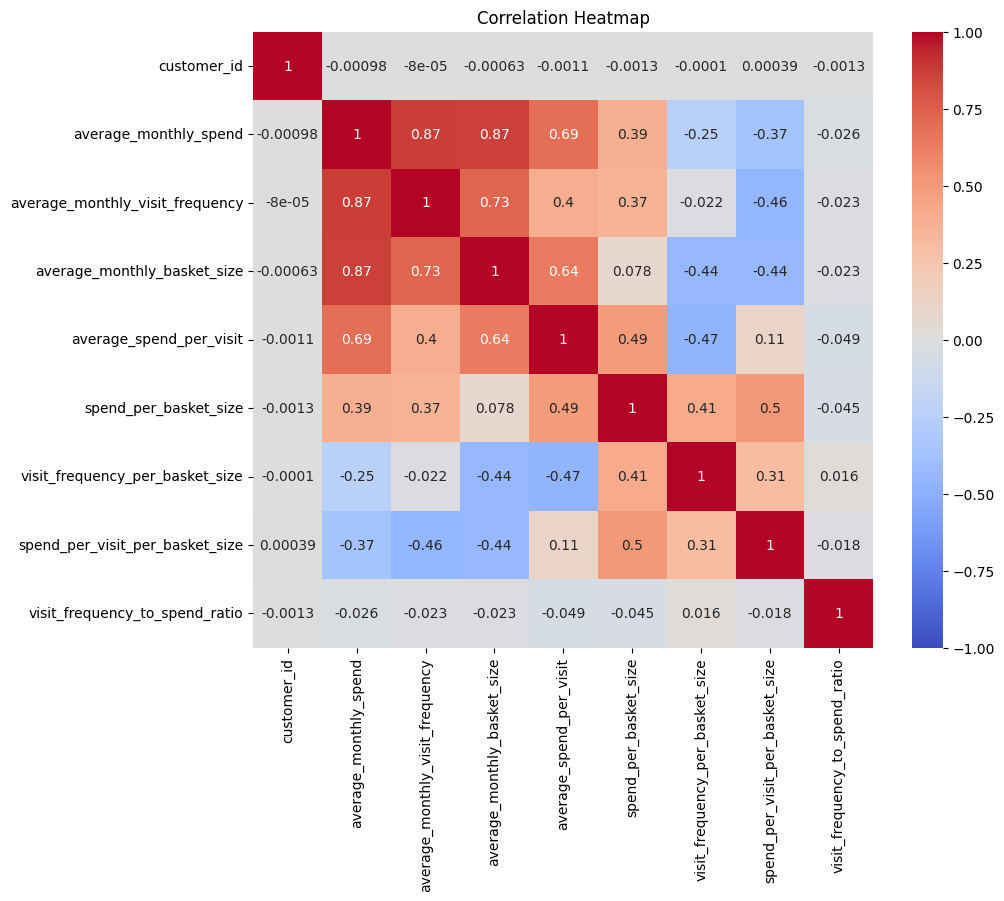

In [352]:
# Generate correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(customer_data[columns].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

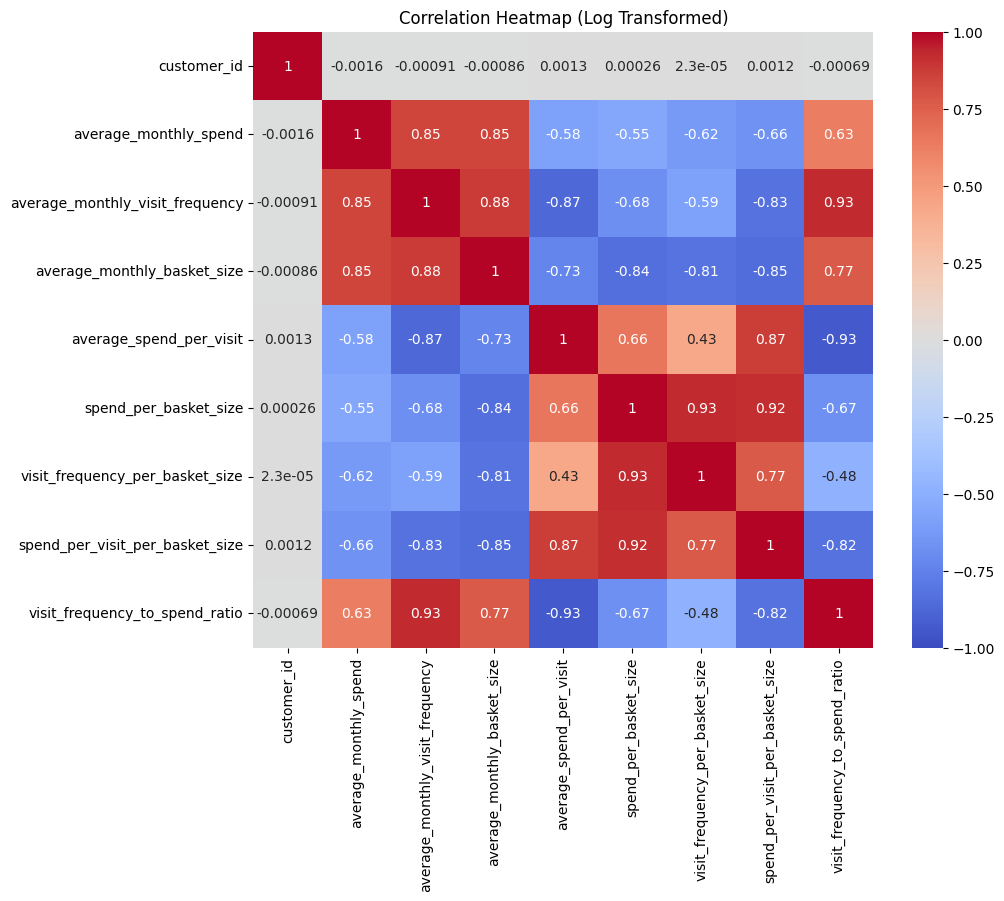

In [353]:
# Generate correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(customer_data_log[columns].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap (Log Transformed)')
plt.show()

Key Observations:


Strong Positive Correlations:

Average Monthly Spend and Visit Frequency to Spend Ratio (0.93): This high correlation suggests that as customers visit more frequently, their spend per visit increases significantly.
Spend per Visit and Spend per Visit per Basket Size (-0.93): This strong negative correlation indicates that as the spend per visit increases, the ratio of spend per visit per basket size decreases, suggesting larger basket sizes might dilute the spend impact per item.


Strong Negative Correlations:

Average Spend per Visit with Average Monthly Spend, Visit Frequency, and Basket Size: Shows negative correlations (-0.58 to -0.87), indicating that higher average spends per visit are associated with lower overall monthly spends, frequencies, or basket sizes. This might suggest a few high-value transactions as opposed to many smaller ones.

Other Notable Correlations:

Spend per Basket Size with Visit Frequency to Spend Ratio (-0.67): A negative correlation here might imply that customers who have a higher spend per basket size generally have a lower ratio of visit frequency to spend, possibly indicating less frequent but larger purchases.
Spend per Visit per Basket Size with Average Monthly Basket Size (-0.85): As the average basket size increases, the spend per visit per basket size decreases, confirming that larger baskets might consist of less expensive items.

In [170]:
customer_data

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size,average_spend_per_visit,spend_per_basket_size,visit_frequency_per_basket_size,spend_per_visit_per_basket_size,visit_frequency_to_spend_ratio
0,1,790.0,1.11,2.840000,711.711712,278.169014,0.390845,250.602715,0.001405
1,2,176875.0,15.74,33.830000,11237.293520,5228.347620,0.465268,332.169480,0.000089
2,3,6812.0,2.11,5.374198,3228.436019,1267.537878,0.392617,600.728852,0.000310
3,4,38542.0,7.82,10.730000,4928.644501,3591.985089,0.728798,459.333132,0.000203
4,5,48712.0,7.51,10.040000,6486.284953,4851.792829,0.748008,646.044318,0.000154
...,...,...,...,...,...,...,...,...,...
559995,559996,42002.0,5.10,9.720000,8235.686275,4321.193416,0.524691,847.292827,0.000121
559996,559997,11523.0,1.43,4.160000,8058.041958,2769.951923,0.343750,1937.029317,0.000124
559997,559998,20502.0,7.02,9.230000,2920.512821,2221.235103,0.760563,316.415257,0.000342
559998,559999,3876.0,1.14,2.840000,3400.000000,1364.788732,0.401408,1197.183099,0.000294


In [366]:
# Check for missing values
missing_values = customer_data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 customer_id                        0
average_monthly_spend              0
average_monthly_visit_frequency    0
average_monthly_basket_size        0
average_spend_per_visit            0
spend_per_basket_size              0
visit_frequency_per_basket_size    0
spend_per_visit_per_basket_size    0
visit_frequency_to_spend_ratio     0
dtype: int64


In [367]:
customer_data_permanent = customer_data.copy()

In [368]:
customer_data_permanent.count()

customer_id                        559997
average_monthly_spend              559997
average_monthly_visit_frequency    559997
average_monthly_basket_size        559997
average_spend_per_visit            559997
spend_per_basket_size              559997
visit_frequency_per_basket_size    559997
spend_per_visit_per_basket_size    559997
visit_frequency_to_spend_ratio     559997
dtype: int64

In [369]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_data[['average_monthly_spend',
       'average_monthly_visit_frequency', 'average_monthly_basket_size',
       'average_spend_per_visit', 'spend_per_basket_size',
       'visit_frequency_per_basket_size', 'spend_per_visit_per_basket_size',
       ]])


In [370]:
customer_data[['average_monthly_spend',
       'average_monthly_visit_frequency', 'average_monthly_basket_size',
       'average_spend_per_visit', 'spend_per_basket_size',
       'visit_frequency_per_basket_size', 'spend_per_visit_per_basket_size',
       ]] = scaled_features


In [371]:
from sklearn.decomposition import PCA

# Performing PCA
pca = PCA(n_components=2)  # Adjust n_components to the number of principal components you want
principal_components = pca.fit_transform(customer_data[['average_monthly_spend',
       'average_monthly_visit_frequency', 'average_monthly_basket_size',
       'average_spend_per_visit', 'spend_per_basket_size',
       'visit_frequency_per_basket_size', 'spend_per_visit_per_basket_size',
       ]])

In [373]:
# from sklearn.decomposition import PCA

# # Performing PCA
# pca = PCA(n_components=2)  # Adjust n_components to the number of principal components you want
# principal_components_log = pca.fit_transform(customer_data_log[['average_monthly_spend',
#        'average_monthly_visit_frequency', 'average_monthly_basket_size',
#        'average_spend_per_visit', 'spend_per_basket_size',
#        'visit_frequency_per_basket_size', 'spend_per_visit_per_basket_size',
#        ]])

In [374]:
# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PCA1', 'PCA2'])


In [376]:
# # Explained variance ratio
# print('Explained Variance Ratio:', pca.explained_variance_ratio_)

# # Adding the PCA DataFrame
# print(pca_df)

In [377]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [378]:
# Clustering with K-means
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(pca_df)

In [379]:
# Adding cluster labels to the PCA DataFrame
pca_df['Cluster'] = clusters



In [380]:
pca_df

,PCA1,PCA2,Cluster
0,-2.149593,-2.295498,3
1,4.093639,0.651416,1
2,-1.543671,-1.557064,3
3,-0.226447,-0.170357,2
4,0.097186,0.556669,2
...,...,...,...
559992,0.083095,0.295800,2
559993,-1.073541,0.007363,2
559994,-0.932170,-0.897369,2
559995,-1.862451,-1.184405,3


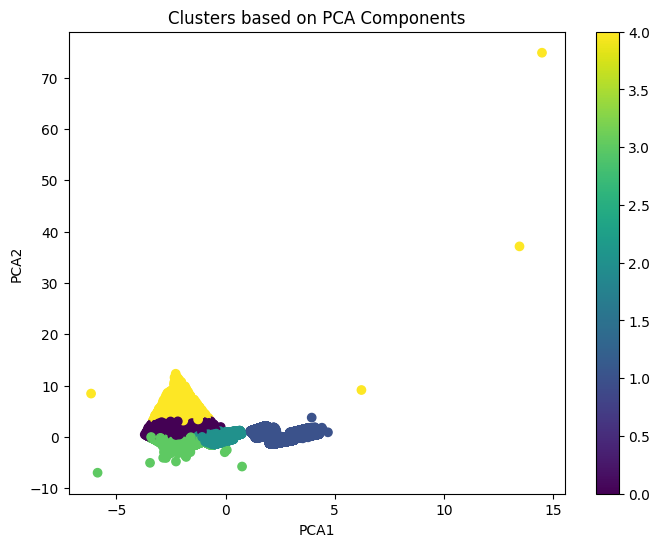

In [381]:
# Plotting the clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c=pca_df['Cluster'], cmap='viridis', marker='o')
plt.title('Clusters based on PCA Components')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar(scatter)
plt.show()

In [382]:
# Ensure both DataFrames are indexed similarly:
pca_df.reset_index(drop=True, inplace=True)
customer_data_permanent.reset_index(drop=True, inplace=True)

In [383]:
customer_data_permanent['cluster'] = pca_df['Cluster']

In [384]:
customer_data_permanent

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size,average_spend_per_visit,spend_per_basket_size,visit_frequency_per_basket_size,spend_per_visit_per_basket_size,visit_frequency_to_spend_ratio,cluster
0,1,790.0,1.11,2.840000,711.711712,278.169014,0.390845,250.602715,0.001405,3
1,2,176875.0,15.74,33.830000,11237.293520,5228.347620,0.465268,332.169480,0.000089,1
2,3,6812.0,2.11,5.374198,3228.436019,1267.537878,0.392617,600.728852,0.000310,3
3,4,38542.0,7.82,10.730000,4928.644501,3591.985089,0.728798,459.333132,0.000203,2
4,5,48712.0,7.51,10.040000,6486.284953,4851.792829,0.748008,646.044318,0.000154,2
...,...,...,...,...,...,...,...,...,...,...
559992,559996,42002.0,5.10,9.720000,8235.686275,4321.193416,0.524691,847.292827,0.000121,2
559993,559997,11523.0,1.43,4.160000,8058.041958,2769.951923,0.343750,1937.029317,0.000124,2
559994,559998,20502.0,7.02,9.230000,2920.512821,2221.235103,0.760563,316.415257,0.000342,2
559995,559999,3876.0,1.14,2.840000,3400.000000,1364.788732,0.401408,1197.183099,0.000294,3


In [385]:
customer_data_permanent.isna().sum()

customer_id                        0
average_monthly_spend              0
average_monthly_visit_frequency    0
average_monthly_basket_size        0
average_spend_per_visit            0
spend_per_basket_size              0
visit_frequency_per_basket_size    0
spend_per_visit_per_basket_size    0
visit_frequency_to_spend_ratio     0
cluster                            0
dtype: int64

In [386]:
customer_data_permanent = customer_data_permanent.drop(['average_spend_per_visit', 'spend_per_basket_size',
       'visit_frequency_per_basket_size', 'spend_per_visit_per_basket_size',
       'visit_frequency_to_spend_ratio'], axis=1)

In [387]:
customer_data_permanent

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size,cluster
0,1,790.0,1.11,2.840000,3
1,2,176875.0,15.74,33.830000,1
2,3,6812.0,2.11,5.374198,3
3,4,38542.0,7.82,10.730000,2
4,5,48712.0,7.51,10.040000,2
...,...,...,...,...,...
559992,559996,42002.0,5.10,9.720000,2
559993,559997,11523.0,1.43,4.160000,2
559994,559998,20502.0,7.02,9.230000,2
559995,559999,3876.0,1.14,2.840000,3


In [389]:
customer_data_permanent.groupby('cluster').describe()['average_monthly_spend']

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,57608.0,9615.378805,3430.779374,28.0,7034.00,9942.0,12510.0,45178.0
1,159994.0,115233.512037,31342.896986,80000.0,91023.00,102156.0,147455.0,198165.5
2,214493.0,33353.872208,10364.010720,6597.0,25987.00,33981.0,41947.0,49999.0
3,109202.0,5261.598418,4301.690618,-12334.0,2110.25,4439.0,7340.0,99100.0
4,18700.0,11819.219287,3286.404043,371.0,10212.75,12192.0,13718.0,198165.5


In [47]:
# Clustering with K-means
kmeans = KMeans(n_clusters=4, random_state=42)
clusters_v2 = kmeans.fit_predict(pca_df)

# Adding cluster labels to the PCA DataFrame
pca_df['Cluster_v2'] = clusters_v2

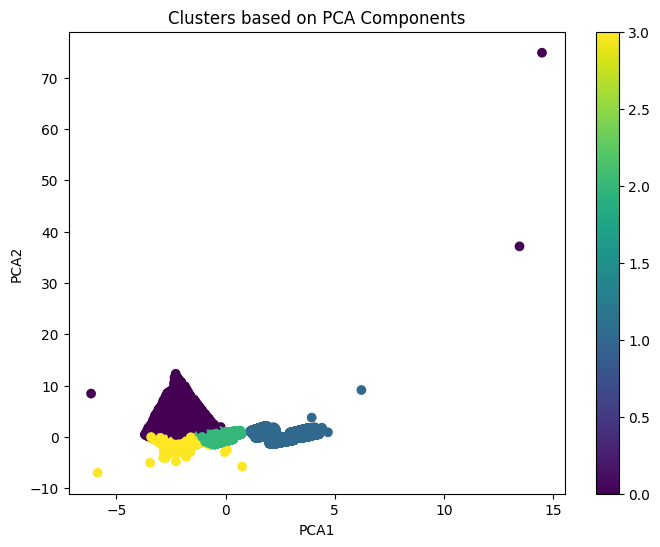

In [48]:
# Plotting the clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c=pca_df['Cluster_v2'], cmap='viridis', marker='o')
plt.title('Clusters based on PCA Components')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar(scatter)
plt.show()

In [173]:
from sklearn.decomposition import PCA

# Performing PCA
pca = PCA(n_components=3)  # Adjust n_components to the number of principal components you want
principal_components = pca.fit_transform(customer_data[['average_monthly_spend',
       'average_monthly_visit_frequency', 'average_monthly_basket_size',
       'average_spend_per_visit', 'spend_per_basket_size',
       'visit_frequency_per_basket_size', 'spend_per_visit_per_basket_size',
       ]])

In [174]:
# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])


In [175]:
# Explained variance ratio
print('Explained Variance Ratio:', pca.explained_variance_ratio_)

# Adding the PCA DataFrame
print(pca_df)

Explained Variance Ratio: [0.5015853  0.27001356 0.16625011]
             PC1       PC2       PC3
0      -2.149593 -2.295498  0.009594
1       4.093639  0.651416  0.042686
2      -1.543671 -1.557064 -0.418697
3      -0.226447 -0.170357  0.527227
4       0.097186  0.556669  0.265697
...          ...       ...       ...
559992  0.083095  0.295800 -0.712527
559993 -1.073541  0.007363 -1.808663
559994 -0.932170 -0.897369  0.827825
559995 -1.862451 -1.184405 -0.735086
559996 -2.155905 -1.937494  0.620951

[559997 rows x 3 columns]


In [176]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Clustering with K-means
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(pca_df)

# Adding cluster labels to the PCA DataFrame
pca_df['Cluster'] = clusters

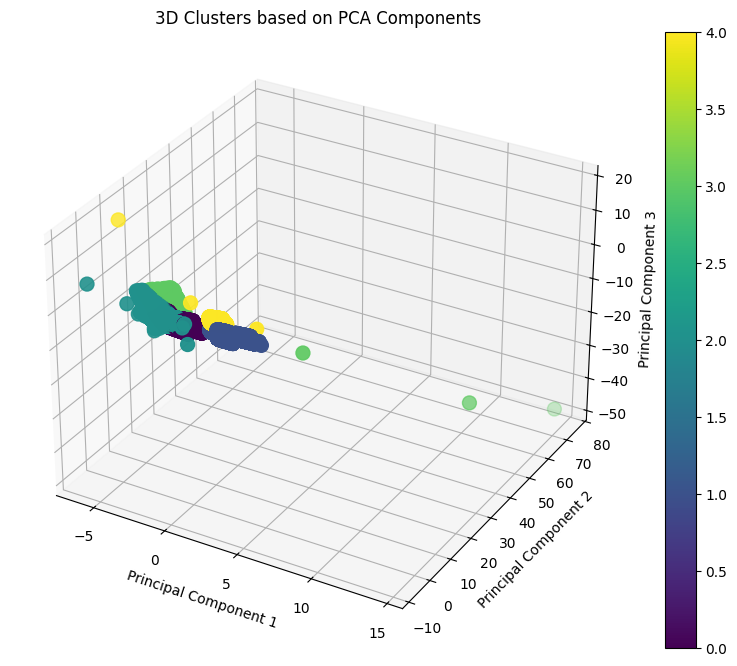

In [177]:
from mpl_toolkits.mplot3d import Axes3D

# 3D Plotting the clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c=pca_df['Cluster'], cmap='viridis', marker='o', s=100)
ax.set_title('3D Clusters based on PCA Components')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.colorbar(scatter)
plt.show()

In [34]:
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [35]:
from sklearn.decomposition import PCA

# Performing PCA
pca = PCA(n_components=2)  # Adjust n_components to the number of principal components you want
pca_data = pca.fit_transform(customer_data[['average_monthly_spend',
       'average_monthly_visit_frequency', 'average_monthly_basket_size',
       'average_spend_per_visit', 'spend_per_basket_size',
       'visit_frequency_per_basket_size', 'spend_per_visit_per_basket_size',
       ]])

In [181]:
dbscan = DBSCAN(eps=0.5, min_samples=2)
dbscan_labels = dbscan.fit_predict(pca_data)

: 

In [36]:
linked = linkage(pca_data, 'single')
hierarchical_labels = fcluster(linked, t=5, criterion='distance')

: 

In [223]:
pca_df

,PCA1,PCA2,Cluster
0,-2.149593,-2.295498,3
1,4.093639,0.651416,1
2,-1.543671,-1.557064,3
3,-0.226447,-0.170357,2
4,0.097186,0.556669,2
...,...,...,...
559992,0.083095,0.295800,2
559993,-1.073541,0.007363,2
559994,-0.932170,-0.897369,2
559995,-1.862451,-1.184405,3


In [267]:
new_df = customer_data.copy()

In [235]:
customer_data

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size,average_spend_per_visit,spend_per_basket_size,visit_frequency_per_basket_size,spend_per_visit_per_basket_size,visit_frequency_to_spend_ratio
0,1,-0.997087,-1.095097,-0.876467,-1.777802,-1.795179,-0.750021,-0.592188,0.001405
1,2,2.713381,1.682527,1.733469,1.710787,0.958162,-0.543431,-0.515653,0.000089
2,3,-0.870191,-0.905239,-0.663040,-0.943661,-1.244881,-0.745103,-0.263657,0.000310
3,4,-0.201576,0.178851,-0.211982,-0.380145,0.048000,0.188108,-0.396332,0.000203
4,5,0.012727,0.119995,-0.270093,0.136117,0.748718,0.241434,-0.221137,0.000154
...,...,...,...,...,...,...,...,...,...
559995,559996,-0.128667,-0.337563,-0.297043,0.715937,0.453593,-0.378475,-0.032301,0.000121
559996,559997,-0.770921,-1.034342,-0.765298,0.657059,-0.409223,-0.880753,0.990223,0.000124
559997,559998,-0.581715,0.026964,-0.338310,-1.045719,-0.714425,0.276287,-0.530435,0.000342
559998,559999,-0.932059,-1.089401,-0.876467,-0.886798,-1.190790,-0.720698,0.296009,0.000294


In [268]:
from sklearn.decomposition import PCA

# Performing PCA
pca = PCA(n_components=2)  # Adjust n_components to the number of principal components you want
principal_components = pca.fit_transform(customer_data[['average_monthly_spend',
       'average_monthly_visit_frequency', 'average_monthly_basket_size',
       'average_spend_per_visit', 'spend_per_basket_size',
       'visit_frequency_per_basket_size', 'spend_per_visit_per_basket_size',
       ]])

# Create a DataFrame with the principal components
pca = pd.DataFrame(data=principal_components, columns=['PCA1', 'PCA2'])

In [269]:
new_df = new_df.drop(['average_spend_per_visit', 'spend_per_basket_size',
       'visit_frequency_per_basket_size', 'spend_per_visit_per_basket_size',
       'visit_frequency_to_spend_ratio'], axis=1)

In [270]:
new_df

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size
0,1,-0.997087,-1.095097,-0.876467
1,2,2.713381,1.682527,1.733469
2,3,-0.870191,-0.905239,-0.663040
3,4,-0.201576,0.178851,-0.211982
4,5,0.012727,0.119995,-0.270093
...,...,...,...,...
559995,559996,-0.128667,-0.337563,-0.297043
559996,559997,-0.770921,-1.034342,-0.765298
559997,559998,-0.581715,0.026964,-0.338310
559998,559999,-0.932059,-1.089401,-0.876467


In [302]:
customer_data_permanent.count()

customer_id                        559997
average_monthly_spend              559997
average_monthly_visit_frequency    559997
average_monthly_basket_size        559997
average_spend_per_visit            559997
spend_per_basket_size              559997
visit_frequency_per_basket_size    559997
spend_per_visit_per_basket_size    559997
visit_frequency_to_spend_ratio     559997
dtype: int64

In [303]:
customer_data_permanent

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size,average_spend_per_visit,spend_per_basket_size,visit_frequency_per_basket_size,spend_per_visit_per_basket_size,visit_frequency_to_spend_ratio
0,1,790.0,1.11,2.840000,711.711712,278.169014,0.390845,250.602715,0.001405
1,2,176875.0,15.74,33.830000,11237.293520,5228.347620,0.465268,332.169480,0.000089
2,3,6812.0,2.11,5.374198,3228.436019,1267.537878,0.392617,600.728852,0.000310
3,4,38542.0,7.82,10.730000,4928.644501,3591.985089,0.728798,459.333132,0.000203
4,5,48712.0,7.51,10.040000,6486.284953,4851.792829,0.748008,646.044318,0.000154
...,...,...,...,...,...,...,...,...,...
559995,559996,42002.0,5.10,9.720000,8235.686275,4321.193416,0.524691,847.292827,0.000121
559996,559997,11523.0,1.43,4.160000,8058.041958,2769.951923,0.343750,1937.029317,0.000124
559997,559998,20502.0,7.02,9.230000,2920.512821,2221.235103,0.760563,316.415257,0.000342
559998,559999,3876.0,1.14,2.840000,3400.000000,1364.788732,0.401408,1197.183099,0.000294


In [304]:
ncustomer_data_permanentew_df = customer_data_permanent.drop(['average_spend_per_visit', 'spend_per_basket_size',
       'visit_frequency_per_basket_size', 'spend_per_visit_per_basket_size',
       'visit_frequency_to_spend_ratio'], axis=1)

In [305]:
ncustomer_data_permanentew_df

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size
0,1,790.0,1.11,2.840000
1,2,176875.0,15.74,33.830000
2,3,6812.0,2.11,5.374198
3,4,38542.0,7.82,10.730000
4,5,48712.0,7.51,10.040000
...,...,...,...,...
559995,559996,42002.0,5.10,9.720000
559996,559997,11523.0,1.43,4.160000
559997,559998,20502.0,7.02,9.230000
559998,559999,3876.0,1.14,2.840000


In [306]:
ncustomer_data_permanentew_df.count()

customer_id                        559997
average_monthly_spend              559997
average_monthly_visit_frequency    559997
average_monthly_basket_size        559997
dtype: int64

In [308]:
columns = ncustomer_data_permanentew_df.columns

In [309]:
# Apply Logarithmic Transformation
for column_name in columns:
    ncustomer_data_permanentew_df[column_name] = np.log1p(ncustomer_data_permanentew_df[column_name])

/Users/vihidun/MyFolder/Development/Datastrome_5.0/myvenv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/vihidun/MyFolder/Development/Datastrome_5.0/myvenv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [310]:
ncustomer_data_permanentew_df.count()

customer_id                        559997
average_monthly_spend              559867
average_monthly_visit_frequency    559991
average_monthly_basket_size        559996
dtype: int64

In [300]:
pca.count()

index    559997
PCA1     559997
PCA2     559997
dtype: int64

In [247]:
new_df.count()

customer_id                        559997
average_monthly_spend              559997
average_monthly_visit_frequency    559997
average_monthly_basket_size        559997
PCA1                               559997
PCA2                               559997
dtype: int64

In [301]:
ncustomer_data_permanentew_df.count()

customer_id                        559997
average_monthly_spend              559867
average_monthly_visit_frequency    559991
average_monthly_basket_size        559996
dtype: int64

In [273]:
pca.isnull().sum()

PCA1    0
PCA2    0
dtype: int64

In [274]:
# Ensure both DataFrames are indexed similarly:
pca.reset_index(inplace=True)
new_df.reset_index(inplace=True)

In [275]:
new_df

,index,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size
0,0,1,-0.997087,-1.095097,-0.876467
1,1,2,2.713381,1.682527,1.733469
2,2,3,-0.870191,-0.905239,-0.663040
3,3,4,-0.201576,0.178851,-0.211982
4,4,5,0.012727,0.119995,-0.270093
...,...,...,...,...,...
559992,559995,559996,-0.128667,-0.337563,-0.297043
559993,559996,559997,-0.770921,-1.034342,-0.765298
559994,559997,559998,-0.581715,0.026964,-0.338310
559995,559998,559999,-0.932059,-1.089401,-0.876467


In [276]:
new_df['PCA1'] = pca['PCA1']
new_df['PCA2'] = pca['PCA2']

In [277]:
new_df

,index,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size,PCA1,PCA2
0,0,1,-0.997087,-1.095097,-0.876467,-2.149593,-2.295498
1,1,2,2.713381,1.682527,1.733469,4.093639,0.651416
2,2,3,-0.870191,-0.905239,-0.663040,-1.543671,-1.557064
3,3,4,-0.201576,0.178851,-0.211982,-0.226447,-0.170357
4,4,5,0.012727,0.119995,-0.270093,0.097186,0.556669
...,...,...,...,...,...,...,...
559992,559995,559996,-0.128667,-0.337563,-0.297043,0.083095,0.295800
559993,559996,559997,-0.770921,-1.034342,-0.765298,-1.073541,0.007363
559994,559997,559998,-0.581715,0.026964,-0.338310,-0.932170,-0.897369
559995,559998,559999,-0.932059,-1.089401,-0.876467,-1.862451,-1.184405


In [278]:
new_df.columns

Index(['index', 'customer_id', 'average_monthly_spend',
       'average_monthly_visit_frequency', 'average_monthly_basket_size',
       'PCA1', 'PCA2'],
      dtype='object')

In [280]:
# Clustering with K-means
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(new_df[['PCA1', 'PCA2']])

In [281]:
# Adding cluster labels to the PCA DataFrame
new_df['Cluster'] = clusters

In [282]:
new_df

,index,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size,PCA1,PCA2,Cluster
0,0,1,-0.997087,-1.095097,-0.876467,-2.149593,-2.295498,3
1,1,2,2.713381,1.682527,1.733469,4.093639,0.651416,1
2,2,3,-0.870191,-0.905239,-0.663040,-1.543671,-1.557064,3
3,3,4,-0.201576,0.178851,-0.211982,-0.226447,-0.170357,2
4,4,5,0.012727,0.119995,-0.270093,0.097186,0.556669,2
...,...,...,...,...,...,...,...,...
559992,559995,559996,-0.128667,-0.337563,-0.297043,0.083095,0.295800,2
559993,559996,559997,-0.770921,-1.034342,-0.765298,-1.073541,0.007363,2
559994,559997,559998,-0.581715,0.026964,-0.338310,-0.932170,-0.897369,2
559995,559998,559999,-0.932059,-1.089401,-0.876467,-1.862451,-1.184405,3


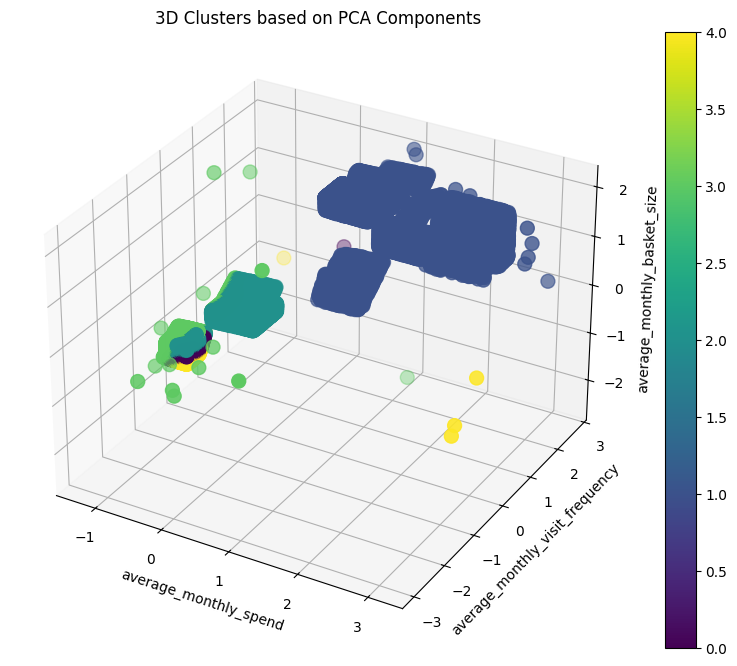

In [283]:
from mpl_toolkits.mplot3d import Axes3D

# 3D Plotting the clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(new_df['average_monthly_spend'], new_df['average_monthly_visit_frequency'], new_df['average_monthly_basket_size'], c=new_df['Cluster'], cmap='viridis', marker='o', s=100)
ax.set_title('3D Clusters based on PCA Components')
ax.set_xlabel('average_monthly_spend')
ax.set_ylabel('average_monthly_visit_frequency')
ax.set_zlabel('average_monthly_basket_size')
plt.colorbar(scatter)
plt.show()

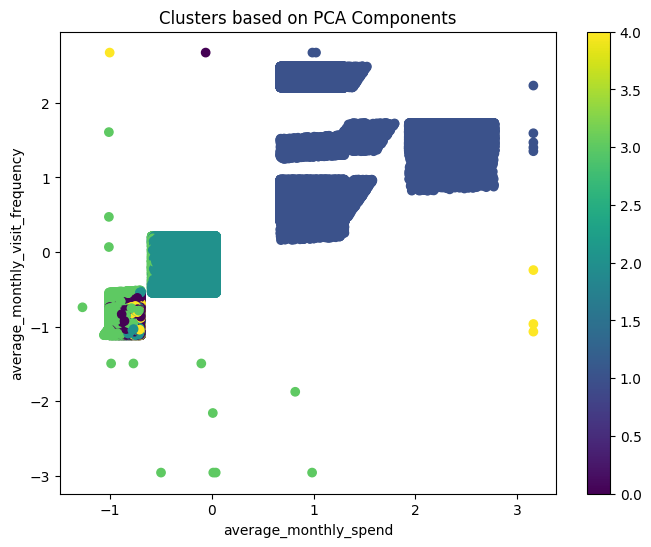

In [286]:
# Plotting the clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(new_df['average_monthly_spend'], new_df['average_monthly_visit_frequency'], c=new_df['Cluster'], cmap='viridis', marker='o')
plt.title('Clusters based on PCA Components')
plt.xlabel('average_monthly_spend')
plt.ylabel('average_monthly_visit_frequency')
plt.colorbar(scatter)
plt.show()

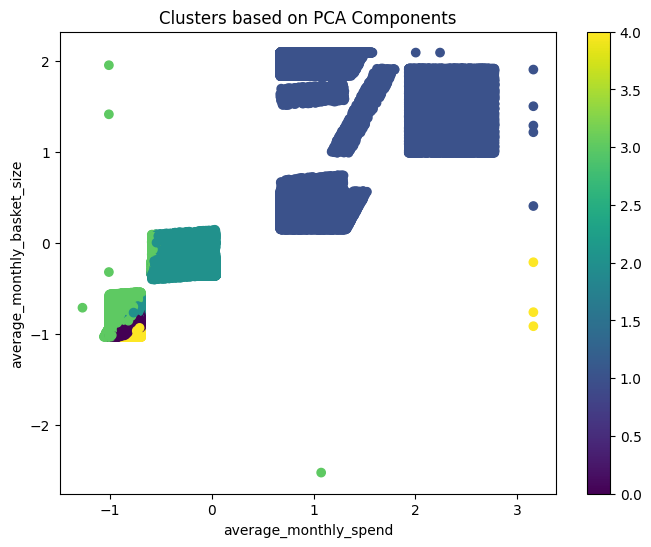

In [287]:
# Plotting the clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(new_df['average_monthly_spend'], new_df['average_monthly_basket_size'], c=new_df['Cluster'], cmap='viridis', marker='o')
plt.title('Clusters based on PCA Components')
plt.xlabel('average_monthly_spend')
plt.ylabel('average_monthly_basket_size')
plt.colorbar(scatter)
plt.show()

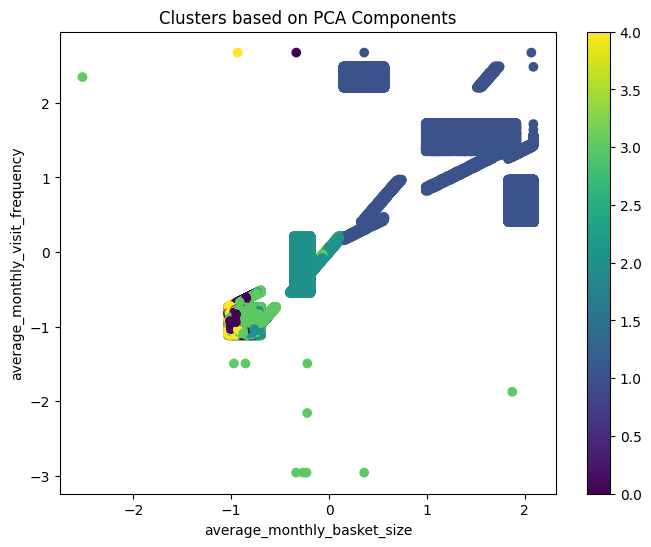

In [288]:
# Plotting the clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(new_df['average_monthly_basket_size'], new_df['average_monthly_visit_frequency'], c=new_df['Cluster'], cmap='viridis', marker='o')
plt.title('Clusters based on PCA Components')
plt.xlabel('average_monthly_basket_size')
plt.ylabel('average_monthly_visit_frequency')
plt.colorbar(scatter)
plt.show()

## Percentile Analysis

In [185]:
pca_df

,PCA1,PCA2,Cluster
0,-2.149593,-2.295498,3
1,4.093639,0.651416,1
2,-1.543671,-1.557064,3
3,-0.226447,-0.170357,2
4,0.097186,0.556669,2
...,...,...,...
559992,0.083095,0.295800,2
559993,-1.073541,0.007363,2
559994,-0.932170,-0.897369,2
559995,-1.862451,-1.184405,3


In [186]:
new_customer_data = customer_data_permanent.copy()

In [188]:
new_customer_data.columns

Index(['customer_id', 'average_monthly_spend',
       'average_monthly_visit_frequency', 'average_monthly_basket_size',
       'average_spend_per_visit', 'spend_per_basket_size',
       'visit_frequency_per_basket_size', 'spend_per_visit_per_basket_size',
       'visit_frequency_to_spend_ratio'],
      dtype='object')

In [192]:
new_customer_data_v1 = new_customer_data.drop(['average_spend_per_visit', 'spend_per_basket_size',
       'visit_frequency_per_basket_size', 'spend_per_visit_per_basket_size',
       'visit_frequency_to_spend_ratio'], axis=1)


In [193]:
new_customer_data_v1

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size
0,1,790.0,1.11,2.840000
1,2,176875.0,15.74,33.830000
2,3,6812.0,2.11,5.374198
3,4,38542.0,7.82,10.730000
4,5,48712.0,7.51,10.040000
...,...,...,...,...
559995,559996,42002.0,5.10,9.720000
559996,559997,11523.0,1.43,4.160000
559997,559998,20502.0,7.02,9.230000
559998,559999,3876.0,1.14,2.840000


In [194]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Clustering with K-means
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(pca_df)

# Adding cluster labels to the PCA DataFrame
new_customer_data_v1['Cluster'] = clusters

In [195]:
new_customer_data_v1

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size,Cluster
0,1,790.0,1.11,2.840000,3
1,2,176875.0,15.74,33.830000,1
2,3,6812.0,2.11,5.374198,3
3,4,38542.0,7.82,10.730000,2
4,5,48712.0,7.51,10.040000,2
...,...,...,...,...,...
559995,559996,42002.0,5.10,9.720000,2
559996,559997,11523.0,1.43,4.160000,2
559997,559998,20502.0,7.02,9.230000,2
559998,559999,3876.0,1.14,2.840000,3


In [198]:
# Function to calculate percentiles for each cluster
def calculate_percentiles(dataframe, cluster_label):
    percentile_list = []
    for cluster in sorted(dataframe[cluster_label].unique()):
        cluster_data = dataframe[dataframe[cluster_label] == cluster]
        percentile_data = {
            'Cluster': cluster,
            'Spend_25th': cluster_data['average_monthly_spend'].quantile(0.25),
            'Spend_50th': cluster_data['average_monthly_spend'].quantile(0.50),
            'Spend_75th': cluster_data['average_monthly_spend'].quantile(0.75),
            'Visit_Freq_25th': cluster_data['average_monthly_visit_frequency'].quantile(0.25),
            'Visit_Freq_50th': cluster_data['average_monthly_visit_frequency'].quantile(0.50),
            'Visit_Freq_75th': cluster_data['average_monthly_visit_frequency'].quantile(0.75),
            'Basket_Size_25th': cluster_data['average_monthly_basket_size'].quantile(0.25),
            'Basket_Size_50th': cluster_data['average_monthly_basket_size'].quantile(0.50),
            'Basket_Size_75th': cluster_data['average_monthly_basket_size'].quantile(0.75)
        }
        percentile_list.append(percentile_data)
    return pd.DataFrame(percentile_list)

# Calculate percentiles for each cluster
cluster_percentiles = calculate_percentiles(new_customer_data_v1, 'Cluster')


In [199]:
cluster_percentiles

,Cluster,Spend_25th,Spend_50th,Spend_75th,Visit_Freq_25th,Visit_Freq_50th,Visit_Freq_75th,Basket_Size_25th,Basket_Size_50th,Basket_Size_75th
0,0,7034.00,9942.0,12510.0,1.53,2.06,2.56,1.73,2.26,2.84
1,1,91023.00,102156.0,147455.0,10.71,14.36,15.97,19.98,33.48,37.09
2,2,25987.00,33981.0,41947.0,4.72,5.80,6.88,9.35,9.90,10.45
3,3,2110.25,4439.0,7340.0,1.58,2.10,2.60,2.78,3.67,4.42
4,4,10212.75,12192.0,13718.0,1.40,1.91,2.48,1.15,1.35,1.61


In [200]:
new_customer_data_v1

,customer_id,average_monthly_spend,average_monthly_visit_frequency,average_monthly_basket_size,Cluster
0,1,790.0,1.11,2.840000,3
1,2,176875.0,15.74,33.830000,1
2,3,6812.0,2.11,5.374198,3
3,4,38542.0,7.82,10.730000,2
4,5,48712.0,7.51,10.040000,2
...,...,...,...,...,...
559995,559996,42002.0,5.10,9.720000,2
559996,559997,11523.0,1.43,4.160000,2
559997,559998,20502.0,7.02,9.230000,2
559998,559999,3876.0,1.14,2.840000,3


In [204]:
from matplotlib.colors import ListedColormap
# Define a color map with 5 distinct colors
cmap = ListedColormap(['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])

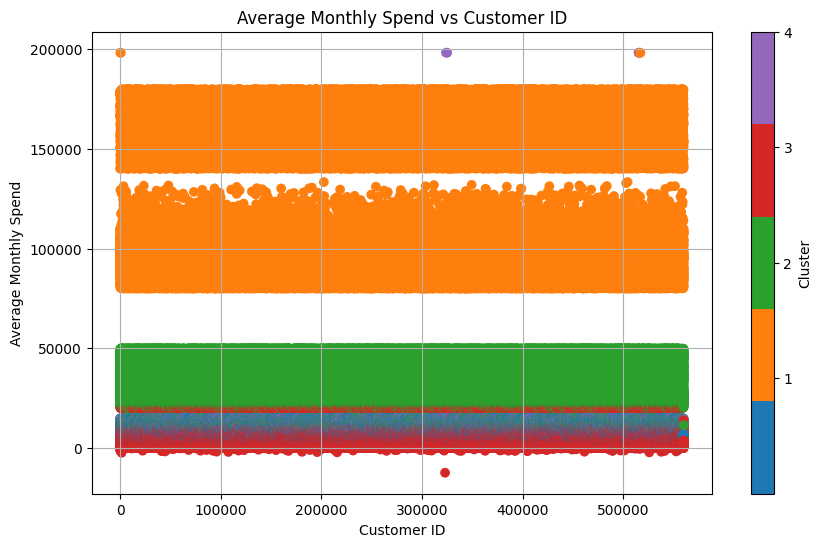

In [205]:
# Plotting
plt.figure(figsize=(10, 6))
scatter = plt.scatter(new_customer_data_v1['customer_id'], new_customer_data_v1['average_monthly_spend'], c=new_customer_data_v1['Cluster'], cmap=cmap)
plt.title('Average Monthly Spend vs Customer ID')
plt.xlabel('Customer ID')
plt.ylabel('Average Monthly Spend')
plt.colorbar(scatter, label='Cluster', ticks=range(1, 6))
plt.grid(True)
plt.show()


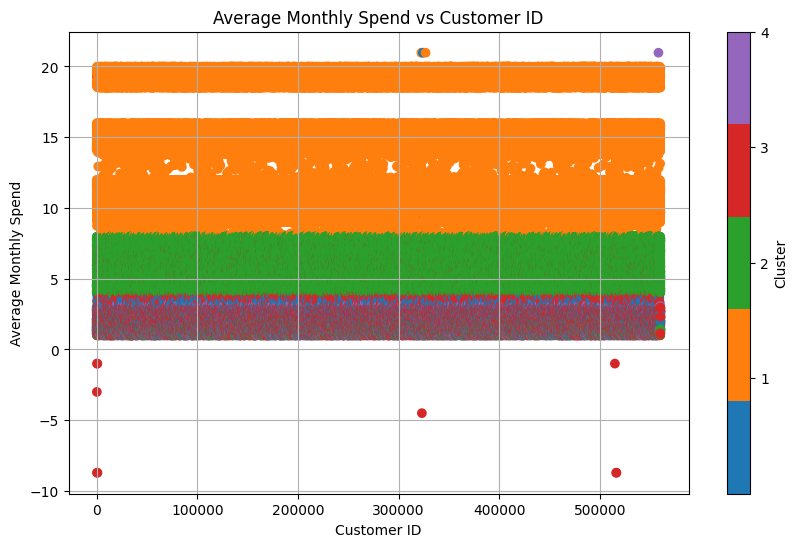

In [206]:
# Plotting
plt.figure(figsize=(10, 6))
scatter = plt.scatter(new_customer_data_v1['customer_id'], new_customer_data_v1['average_monthly_visit_frequency'], c=new_customer_data_v1['Cluster'], cmap=cmap)
plt.title('Average Monthly Spend vs Customer ID')
plt.xlabel('Customer ID')
plt.ylabel('Average Monthly Spend')
plt.colorbar(scatter, label='Cluster', ticks=range(1, 6))
plt.grid(True)
plt.show()
